In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def SVD(A_original, tolerance = 1e-10):
    A = deepcopy(A_original).astype(float)
    ata = A.T @ A
    eig_values, eig_vectors = np.linalg.eig(ata) #(values, vectors)
    eig_vectors = eig_vectors.T

    #sortujemy malejąco wartości własne
    sort_indices = np.argsort(-eig_values)
    eig_values = eig_values[sort_indices]
    eig_vectors = eig_vectors[sort_indices]
    
    #Wybieramy jedynie niezerowe wartości własne
    nonzero_indices = np.where(abs(eig_values) > tolerance)
    eig_values_cut = eig_values[nonzero_indices]
    eig_vectors_cut = eig_vectors[nonzero_indices]
    
    #Tworzę listę wartości osobliwych
    singular_values = np.sqrt(eig_values_cut)
    
    wk_vectors = [(1/singular_values[i])*(A@eig_vectors_cut[i]) for i in range(len(singular_values))]
    W = np.array(wk_vectors).T
    Sigma = np.diag(singular_values)
    
    return W, Sigma, eig_vectors_cut

In [3]:
def MP_inv(A_original, check = False, tolerance = 1e-10):
    A = deepcopy(A_original).astype(float)
    W, Sigma, VT = SVD(A, tolerance = tolerance)
    mp_invA = VT.T @ np.diag(1/np.diag(Sigma)) @ W.T
    
    if check:
        print("Aksjomat 1:")
        print(np.allclose(A@mp_invA@A, A, atol = tolerance))
        print("Aksjomat 2:")
        print(np.allclose(mp_invA@A@mp_invA, mp_invA, atol = tolerance))
        print("Aksjomat 3:")
        print(np.allclose((A@mp_invA).T, A@mp_invA, atol = tolerance))
        print("Aksjomat 4:")
        print(np.allclose((mp_invA@A).T, mp_invA@A, atol = tolerance))
    
    return mp_invA 

In [4]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
tolerance = 1e-10
mp_invA = MP_inv(A, check = True)
#A = np.random.randint(1,10, size = (3,3))
#W, Sigma, VT = SVD(A)
print(A)
#print()
#print(W @ Sigma @ VT)
print(mp_invA)


Aksjomat 1:
True
Aksjomat 2:
True
Aksjomat 3:
True
Aksjomat 4:
True
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-6.38888889e-01 -1.66666667e-01  3.05555556e-01]
 [-5.55555556e-02  2.40076826e-15  5.55555556e-02]
 [ 5.27777778e-01  1.66666667e-01 -1.94444444e-01]]


     wiek   prawdo
0       0  0.00417
1       1  0.00032
2       2  0.00023
3       3  0.00018
4       4  0.00015
..    ...      ...
96     96  0.29514
97     97  0.31029
98     98  0.32536
99     99  0.34029
100   100  0.35500

[101 rows x 2 columns]


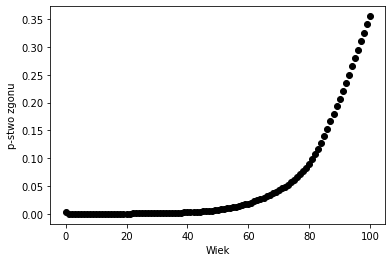

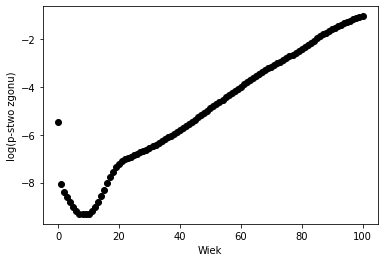

In [5]:
tablica = pd.read_csv('tablica.csv',
                      sep=';', decimal=',')
print(tablica)
tablica['log_prawdo'] = np.log(tablica['prawdo'])

plt.figure()
plt.scatter(tablica['wiek'], tablica['prawdo'], c='black', label='datapoints')
plt.xlabel('Wiek')
plt.ylabel('p-stwo zgonu')
plt.show()

plt.figure()
plt.scatter(tablica['wiek'], tablica['log_prawdo'], c='black', label='datapoints')
plt.xlabel('Wiek')
plt.ylabel('log(p-stwo zgonu)')
plt.show()

[ 0.08167983 -8.95721996]


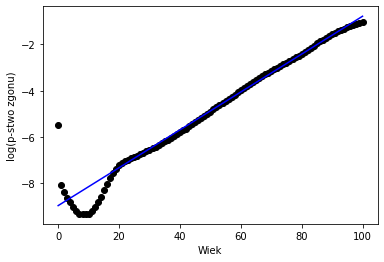

In [6]:
dane = tablica[tablica['wiek']>20]
dane.head()
dane['wiek'].values
A = np.array(list(zip(dane['wiek'].values, np.ones(dane['wiek'].size))))
mp_inv_A = MP_inv(A)
y = dane['log_prawdo'].to_numpy()
b = A@mp_inv_A@y
coef = mp_inv_A@y
print(coef)

plt.figure()
plt.scatter(tablica['wiek'], tablica['log_prawdo'], c='black', label='datapoints')
plt.xlabel('Wiek')
plt.ylabel('log(p-stwo zgonu)')
plt.plot(tablica['wiek'], coef[0]*tablica['wiek']+coef[1], c="blue")
plt.show()

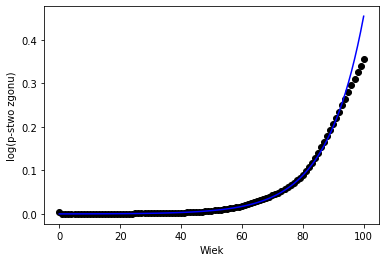

In [7]:
plt.figure()
plt.scatter(tablica['wiek'], tablica['prawdo'], c='black', label='datapoints2')
plt.xlabel('Wiek')
plt.ylabel('log(p-stwo zgonu)')
plt.plot(tablica['wiek'], np.exp(coef[0]*tablica['wiek']+coef[1]), c="blue")
plt.show()

In [ ]:
np.linspace(0, 1, 100)


In [29]:
def interpolate(x, y):
    n = x.shape[0]
    coef = np.empty(n-1)
    coef[0] = 1
    return coef

In [30]:
x = interpolate(np.array([2, 3]), np.array([4, 3]))
x

array([1.])